# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis.  I'm a novice in data analysis. I'm interested in the video games, mobility, culture, and content industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.  

This is my first Kaggle-data analyzing project on my own. I played(?) with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  
_ps. English may seem a little awkward because it is not my first language. I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


## Importing Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn as sk
# import tensorflow as tf
# import keras

np.random.seed(0)
# tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
# print(sk.__version__)
# print(tf.__version__)
# print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.5.3
1.22.4


In [2]:
df = data
df.head()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 4. The average number of "finished" challenges 
---
##### Q4. The average number of finished challenges for each division shows the division with the highest and lowest average challenges.

This question is clear, thankfully. I'll separate the division and calculate the average challenges.  
But we have to think about the word "finished". "finished" challenges would mean "dead" characters, but there are no dead characters in the modes which are not 'Hardcore' mode.  

So I got the values with 'dead' characters in HC modes('Hardcore Harbinger', 'SSF Harbinger HC') and got the values with all characters in other modes. 

First, let's see the average, maximum and minimum number of challenges.

In [13]:
# simple avg, max and min about all characters
df.groupby(by = 'ladder')[['challenges']].agg(['mean', 'max', 'min'])

challenges        
                         mean max min
ladder                               
Harbinger               33.47  40  13
Hardcore Harbinger      27.17  40   8
SSF Harbinger           22.15  40   9
SSF Harbinger HC        20.29  40   4

#### [graph 4-1] Violin plot about Challenges by ladder

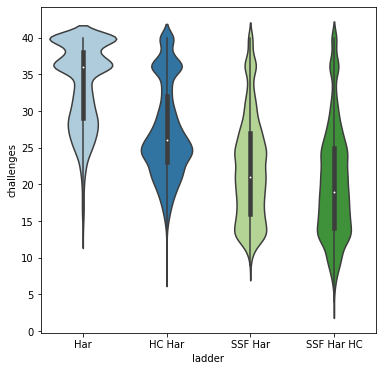

In [25]:
# visualizing the average
plt.rcParams["figure.figsize"] = (6, 6)
sns.violinplot(data = df.sort_values(by = 'ladder'), x = 'ladder', y = 'challenges', palette = 'Paired')
plt.xticks(ticks = [i for i in range(4)], labels = ['Har', 'HC Har', 'SSF Har', 'SSF Har HC'])

plt.show()

In [52]:
# data preparing
# if not HC mode, commit the dead column

df1 = df[['dead', 'ladder', 'challenges']].copy()
print(df1['dead'].sum())
df1.loc[df1['ladder'] == 'Harbinger', 'dead'] = True
df1.loc[df1['ladder'] == 'SSF Harbinger', 'dead'] = True
print(df1['dead'].sum())

20581
50480


### Answer: highest and lowest average challenge of finished challenge by division
where is highest and lowest average? 

In [53]:
df1[df1['dead'] == True].groupby('ladder')['challenges'].agg(['mean', 'max', 'min']).sort_values(['mean'], ascending = False)

,mean,max,min
ladder,,,
Harbinger,33.47,40,13
Hardcore Harbinger,27.23,40,12
SSF Harbinger,22.15,40,9
SSF Harbinger HC,19.97,40,4


In [68]:
print('Highest average challenges:', 
      df1[df1['dead'] == True].groupby('ladder')['challenges'].agg(['mean', 'max', 'min']).sort_values(['mean'], ascending = False).index[0])
print('Lowest average challenges:', 
      df1[df1['dead'] == True].groupby('ladder')['challenges'].agg(['mean', 'max', 'min']).sort_values(['mean'], ascending = False).index[-1])

Highest average challenges: Harbinger
Lowest average challenges: SSF Harbinger HC


### results:
The challenge number are decreasing if it's a Hardcore mode. SSF modes are lower than other modes.    
1. Hardcore mode has characters' death. Therefore they must be stopped one day. So they'll do their best carefully and harder each time of challenge. (It means each challenge is burdensome and stressful.)  
2. It seems single-player modes are more exhausting than multi-player modes. There are no motivating factors except himself and his results. They fight all by themselves without any allies. Maybe it makes them give up on doing it 'one more time'.  

Actually, these are regardless of the numbers above. The insight-able result needs more knowledge of the game. I'm bad to couldn't imagine the gap between one or two times challenges. If you know about this, please write a comment, I'd really appreciate that.  

# 5. Is the class of the dead characters related to level?
---
##### Q5. Show dependency between level and class of dead characters. Only for HC divisions.

The dead column has a meaning in only hardcore modes.  
That means maybe this: the goal of the hardcore mode is survival with the best playing, and maybe alive characters can restart or continue the game.  

I understood this question as the relation between the dead characters' class and the level.   
Because we can think that the death is related just level(user's ability) or maybe the class is the problem.  
If there is a dependency between level and class in dead characters, we can treat that some particular class is **preferred** because of the difficulty or something like that, regardless of the class's performance(because it's already ended games).

The methods which can get the dependency,  
    1. get correlation between level and class.  
    2. compare the average level by each class (+ t-test)

And I imagine also this : make a machine learning model with class and level, and watch whether the model can predict the class just with level! I'm little bit sorry for the computer but the computer can't do that.


## 5-1. describes and data preprocessing
### (1) ratio of dead characters

In [ ]:
# dataframe contains only hardcore modes
df_hc = df.loc[df['ladder'].isin(['SSF Harbinger HC', 'Hardcore Harbinger'])]

# dead characters rate
df_hc.pivot_table(index = 'ladder', values = 'dead')

### (2) level distribution

In [ ]:
df_hc['level'].describe()

In [ ]:
plt.figure(figsize = (6, 3))
sns.histplot(x = df_hc['level'], palette = 'Paired', kde = True)
plt.title("level of dead characters in Hardcore mode")
plt.show()

Many people already know that **the minimum level of users in Hardcore mode is 53** before reaching this question.  
This is quite important because the scale is regarded as big. After all, because it starts at 53.  
So I applied **Min-Max scaler** in this case because the minimum and maximum are settled.  

### (3) preprocessing the data

In [ ]:
# dead
df_dead = df_hc.loc[df['dead'] == True][['class', 'level']]
df_dead

In [ ]:
# Min-Max Scaling
Xmin = min(df_dead['level'])
Xmax = max(df_dead['level'])
scaled = (df_dead['level'] - Xmin) / (Xmax - Xmin)
df_dead['scaled_level'] = scaled
df_dead.head(5)

#### get dummies

In [ ]:
df_deads_onehot = pd.get_dummies(df_dead, drop_first = False)
df_deads_onehot.head(5)

## 5-1. correlation

In [ ]:
df_deads_onehot.corr().round(3)

In [ ]:
mask = np.zeros_like(df_deads_onehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))
sns.heatmap(data = df_deads_onehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -1, vmax = 1)
plt.title('Correlation matrix')
plt.show()

#### result1:
That seems there's no correlation between the level and the class, but the data indeed became scarce data after getting dummies.  
In this case, we can use polyserial correlation analysis.

`stats.pointbiserialr` need bools array... 'biserial'... this is nominal...

## 5-2. Average level of each class 

### 5-2-1. Average level

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
plt.xticks(rotation = 90)
plt.ylim(50, 105)
df_hc_lev_mean = df_dead.groupby('class')[['level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'level') # 신뢰구간 표시 못하나 그냥 boxplot그려야 하나
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
plt.xticks(rotation = 90)
df_hc_lev_mean = df_dead.groupby('class')[['scaled_level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'scaled_level')
plt.show()

아니 스케일링을 하는 이유가 없어지는데... 그냥 해야겠다. 다 지우고,,,, 그냥 기록만 남기고...

그래프를 보고 알 수 있는 것: 듀엘리스트, 머러더, 레인저, 사이온, 셰도우, 템플러, 위치는 평균 레벨이 현저히 낮다.  
아마 이 모든 클래스를 데리고 ANOVA를 하면 분명 다르다고 할 것이고, 전부 사후검정을 하게되면 이 클래스들에서 차이가 나타날 것이다.  
일부 클래스에서 낮은 것은 사실이나 이것이 꼭 레벨과 관련이 있다고 할 수 있는 것은 아니다.  
왜냐하면 이미 언급했듯, 이 모드의 최소 레벨은 53으로, 경험이 풍부한 사람이 부 캐릭터를 53까지 키워서 하드코어 모드에서 기록을 세웠을 가능성이 다분하며, 그 직업들이 하드코어모드에서 충분히 인기있는 클래스들이었다면 더욱더 이 시나리오가 맞을 가능성이 높다.   

그리고 해야할 것 
- 클래스별 평균 구하기
- 평균이 다른지 ANOVA 하기